In [100]:
import importlib
import versDV as dv
import deviatoire as dev
from math import pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt
import timeit
importlib.reload(dv)
importlib.reload(dev)

<module 'deviatoire' from '/root/DangVan/old/deviatoire.py'>

In [2]:

points1 = dv.nuage(100, 2*dv.pi, 0.01, 1)
points2 = dv.nuageOrt(100, 2*dv.pi, 0.01, 1)
    

In [3]:


time1=timeit.timeit(
    "amplitudeTangMax(test_tens)",
    setup="from versDV import amplitudeTangMax, genereTens; from math import pi; test_tens = genereTens(100, 2*pi, 0.01, 0.1)[0]",
    number=1
);print(f'{time1:.3f}')
time2=timeit.timeit(
    "recentre(matTens)",
    setup="import versDV as dv; from deviatoire import recentre; from math import pi; matTens = dv.genereTens(100, 2*pi, 0.01, 0.1)",
    number=1
);print(f'{time2:.3f}')

0.170
0.003


**Evaluation de la performance de la méthode de Dang Van originelle vs la méthode de Dang Van allégée**

In [4]:
time1//time2

59.0

On constate que la méthode allégée est environ **160 fois** plus rapide que la méthode originelle

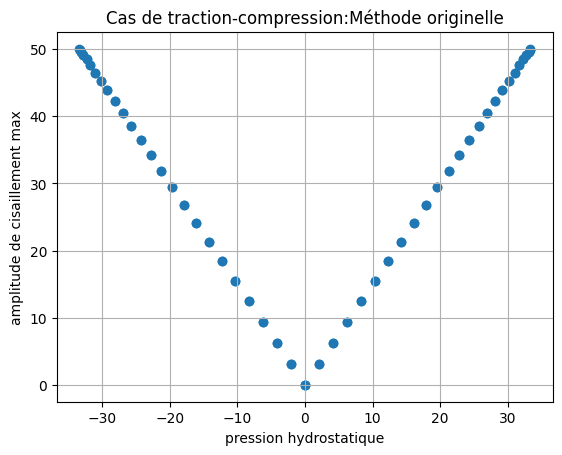

In [5]:
dv.traceNuage(points1)

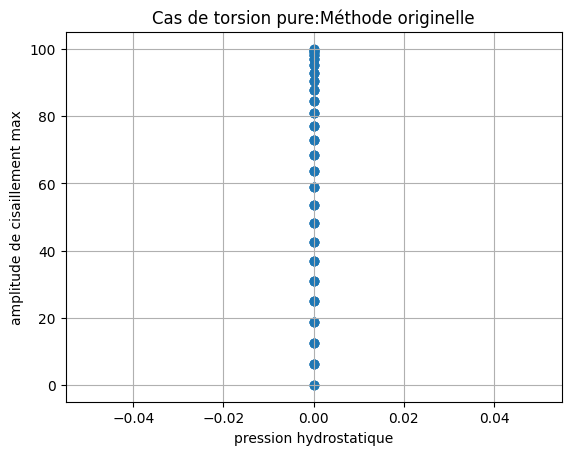

In [6]:
dv.traceNuageOrt(points2)


In [102]:
T=dv.genereTens(sigma1=100,pasTemps=.001,omega=2*np.pi,fin=1)
dv.save_tens_to_csv(T,"./datas/tensor_multiaxiale.csv")

In [103]:
matTens=dv.load_tens_from_csv('./datas/tensor_multiaxiale.csv')
matDev=dev.CalculMatDev(matTens)


In [104]:
dv.hydro(matTens[0]),matTens[0]

(33.333333333333336, array([100.,   0.,   0., -10.,   0.,   0.]))

In [105]:
dev.deviateur(matTens[0])


array([ 66.66666667, -33.33333333, -10.        ,   0.        ,
         0.        ])

In [106]:
dev.diametre(matTens)

(200.7596294727362,
 array([ 66.66666667, -33.33333333, -10.        ,   0.        ,
          0.        ]),
 array([-66.66140295,  33.33070147,   0.1256604 ,   0.        ,
          0.        ]))

In [107]:
Rec,centre=dev.recentre(matTens)
pointsJ2=np.array([dev.normeJ2(Rec[i]) for i in range(Rec.shape[0])]).T
pointsTresca=np.array([dev.normeTresca(Rec[i]) for i in range(Rec.shape[0])]).T
pointsTresca*=.5
# points3= np.vstack((points3, dv.hydro(Rec)))

points4=np.array([dv.hydro(matTens[i]) for i in range(matTens.shape[0])]).T


In [108]:
centre


array([ 2.63185987e-03, -1.31592994e-03, -4.93716980e+00,  0.00000000e+00,
        0.00000000e+00])

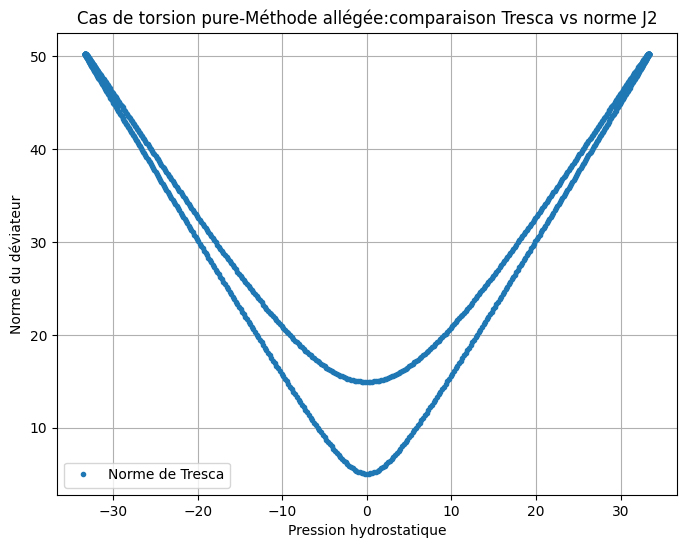

In [111]:
plt.figure(figsize=(8,6))
# plt.plot(points4, pointsJ2,'.',label="Norme J2")
plt.plot(points4, pointsTresca,'.',label="Norme de Tresca")
plt.legend()
plt.ylabel("Norme du déviateur")
plt.xlabel("Pression hydrostatique")
plt.title("Cas de torsion pure-Méthode allégée:comparaison Tresca vs norme J2")
plt.grid()
plt.show()

In [112]:
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = ax.plot([], [], '--', label='J2',linewidth=3)
ln1, = ax.plot([], [], ':', label='Tresca',linewidth=1)

def init():
    ax.set_xlim(points4.min(), points4.max())
    ax.set_ylim(min(pointsJ2.min(), pointsTresca.min()), max(pointsJ2.max(), pointsTresca.max()))
    ln.set_alpha(.5)
    ln1.set_alpha(1)
    ax.legend()
    return ln, ln1


def update(frame):
    xdata = points4[:frame]
    ydata = pointsJ2[:frame]
    ln.set_data(xdata, ydata)
    ydata_t = pointsTresca[:frame]
    ln1.set_data(xdata, ydata_t)
    return ln, ln1
ani = FuncAnimation(fig, update, frames=range(1, len(points4)+1),
                    init_func=init, blit=False)
ani.save("test.gif")
"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.animation import FuncAnimation\n\nfig, ax = plt.subplots()\nln, = ax.plot([], [], \'--\', label=\'J2\',linewidth=3)\nln1, = ax.plot([], [], \':\', label=\'Tresca\',linewidth=1)\n\ndef init():\n    ax.set_xlim(points4.min(), points4.max())\n    ax.set_ylim(min(pointsJ2.min(), pointsTresca.min()), max(pointsJ2.max(), pointsTresca.max()))\n    ln.set_alpha(.5)\n    ln1.set_alpha(1)\n    ax.legend()\n    return ln, ln1\n\n\ndef update(frame):\n    xdata = points4[:frame]\n    ydata = pointsJ2[:frame]\n    ln.set_data(xdata, ydata)\n    ydata_t = pointsTresca[:frame]\n    ln1.set_data(xdata, ydata_t)\n    return ln, ln1\nani = FuncAnimation(fig, update, frames=range(1, len(points4)+1),\n                    init_func=init, blit=False)\nani.save("test.gif")\n'